In [2]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

In [4]:
ser = serial.Serial('COM3', 9600, timeout=1)
dut.connect(ser)

In [5]:
dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default


In [6]:
drv.clk_stop('ADC_CK')
drv.clk_stop('CK_ARRAY')
drv.clk_config('ADC_CK', divisor=2)
drv.clk_config('CK_ARRAY', divisor=2)
drv.clk_start('ADC_CK')
drv.clk_start('CK_ARRAY')

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


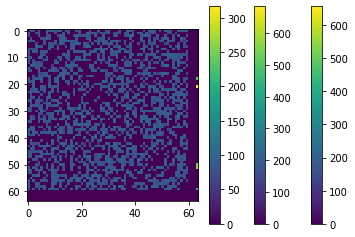

In [7]:
vRead = 0.2
Vgate = 5

arr = 0
numRows = 64
numCols = 64
Gmap0 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap0[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0)
plt.colorbar()

arr = 1
numRows = 64
numCols = 64
Gmap1 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1)
plt.colorbar()

arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2)
plt.colorbar()

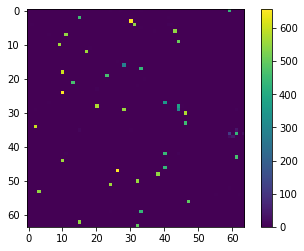

In [8]:
plt.imshow(Gmap0)
plt.colorbar()

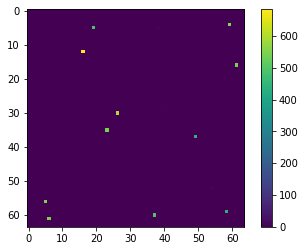

In [9]:
plt.imshow(Gmap1)
plt.colorbar()

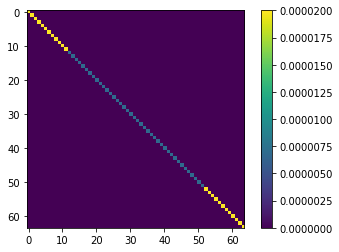

In [10]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_neg = mat_contents['G_neg']
plt.imshow(G_neg)
plt.colorbar()

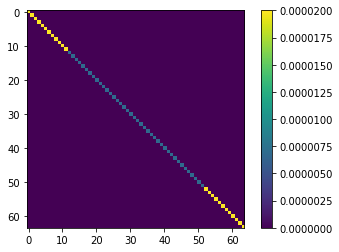

In [11]:
targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]
plt.imshow(targetG)
plt.colorbar()

Now turning ON
Set, Vgate =  0.5
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
64  are still too far below target Conductance
63  are still too far below target Conductance
63  are still too far below

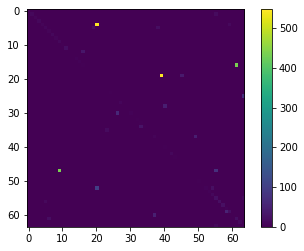

In [12]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_neg = mat_contents['G_neg']

vRead = 0.2

arr = 1
Vgate = 5
Vref = 0.5

targetTolerance = 2e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 4.1, 0.08)
vGateSetRamp = np.arange(0.5, 1.65, 0.05)
vResetRamp = np.arange(0.3, 4.05, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

finalGM = a0.hybrid_array_program(targetG, targetGTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, arr, maxLoops=maxLoops)

time.sleep(15)
arr = 1
numRows = 64
numCols = 64
Gmap1post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1post)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='Prober2_Chp42_Arr1_LinEq_After')

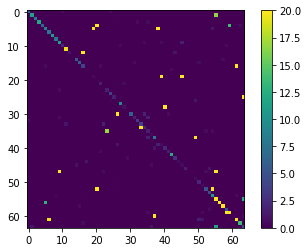

In [14]:
plt.imshow(Gmap1post, clim=[0, 20])
plt.colorbar()


Now turning ON
Set, Vgate =  0.4
51  are still too far below target Conductance
49  are still too far below target Conductance
49  are still too far below target Conductance
49  are still too far below target Conductance
48  are still too far below target Conductance
48  are still too far below target Conductance
47  are still too far below target Conductance
47  are still too far below target Conductance
46  are still too far below target Conductance
46  are still too far below target Conductance
46  are still too far below target Conductance
46  are still too far below target Conductance
46  are still too far below target Conductance
44  are still too far below target Conductance
44  are still too far below target Conductance
43  are still too far below target Conductance
43  are still too far below target Conductance
43  are still too far below target Conductance
43  are still too far below target Conductance
43  are still too far below target Conductance
43  are still too far below

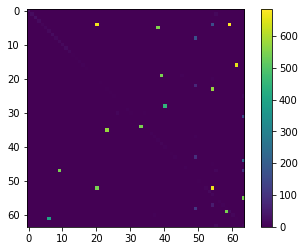

In [15]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_neg = mat_contents['G_neg']

vRead = 0.2

arr = 1
Vgate = 5
Vref = 0.5

targetTolerance = 2e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 4.1, 0.05)
vGateSetRamp = np.arange(0.4, 1.65, 0.05)
vResetRamp = np.arange(0.3, 5.1, 0.20)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 5

finalGM = a0.hybrid_array_program(targetG, targetGTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, arr, maxLoops=maxLoops)

time.sleep(15)
arr = 1
numRows = 64
numCols = 64
Gmap1post = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1post[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1post)
plt.colorbar()

time.sleep(15)
save_workspace(vars(), note='Prober2_Chp42_Arr1_LinEq_After2')

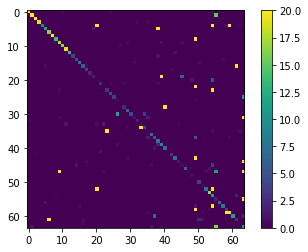

In [22]:
plt.imshow(Gmap1post, clim=[0, 20])
plt.colorbar()

Device (row= 4 col= 20 ) switched OFF at V= 2.8000000000000003
Device (row= 4 col= 20 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 4 col= 20 ) Init G= 0.0006637341153470184  Final G= 0.0 Err= 0.0
Device (row= 4 col= 54 ) switched OFF at V= 3.0500000000000003
Device (row= 4 col= 54 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 4 col= 54 ) Init G= 0.00015053763440860216  Final G= 0.0 Err= 0.0
Device (row= 4 col= 59 ) switched OFF at V= 3.0500000000000003
Device (row= 4 col= 59 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 4 col= 59 ) Init G= 0.000684261974584555  Final G= 0.0 Err= 0.0
Device (row= 5 col= 38 ) switched OFF at V= 2.8000000000000003
Device (row= 5 col= 38 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 5 col= 38 ) Init G= 0.0005542521994134896  Final G= 0.0 Err= 0.0
Device (row= 8 col= 49 ) switched OFF at V= 2.5500000000000003
Device (row= 8 col= 49 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 8 col

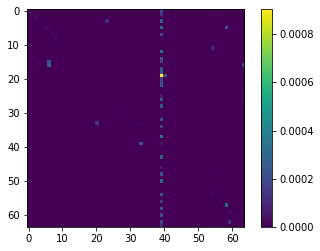

In [24]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_neg = mat_contents['G_neg']

vRead = 0.2

arr = 1
Vgate = 5
Vref = 0.5

targetTolerance = 2e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 4.1, 0.05)
vGateSetRamp = np.arange(0.4, 1.65, 0.05)
vResetRamp = np.arange(0.3, 5.1, 0.20)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.5, 1.5, 0.05)
vResetRamp = np.arange(0.3, 4.8, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

DiffG = np.abs(Gmap1post*1e-6 - targetG)
rowscols=np.nonzero(DiffG >20e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
arr = 1
numRows = 64
numCols = 64
Gmap1Fix = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1Fix[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap1Fix)
plt.colorbar()

save_workspace(vars(), note='Prober2_Chp42_Arr1_LinEq_After3')

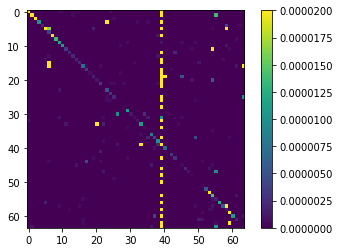

In [27]:
plt.imshow(Gmap1Fix, clim=[0, 20e-6])
plt.colorbar()

In [30]:
DiffG = np.abs(Gmap1Fix - targetG)
rowscols=np.nonzero(DiffG >10e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
print(numDevices)

57


In [31]:
testCols

array([39, 39, 55, 23, 39,  4,  6, 39, 58,  6, 39, 11, 54, 39, 39,  6, 39,
        6, 63, 39, 39, 39, 40, 39, 39, 39, 39, 63, 39, 39, 39, 39, 20, 39,
       39, 33, 39, 39, 39, 39, 39, 52, 39, 55, 39, 57, 58, 39, 58, 39, 61,
       39, 59, 62, 39, 55, 63], dtype=int64)

Device (row= 0 col= 39 ) switched OFF at V= 2.9
Device (row= 0 col= 39 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 0 col= 39 ) Init G= 0.00019387422613229065  Final G= 0.0 Err= 0.0
Device (row= 1 col= 39 ) switched OFF at V= 3.1
Device (row= 1 col= 39 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 1 col= 39 ) Init G= 0.0001277289019224503  Final G= 0.0 Err= 0.0
Device (row= 1 col= 55 ) switched OFF at V= 3.1
Device (row= 1 col= 55 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 1 col= 55 ) Init G= 1.1632453567937438e-05  Final G= 0.0 Err= 0.0
Device (row= 3 col= 23 ) switched OFF at V= 2.9
Device (row= 3 col= 23 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 3 col= 23 ) Init G= 7.35581622678397e-05  Final G= 0.0 Err= 0.0
Device (row= 3 col= 39 ) switched OFF at V= 3.1
Device (row= 3 col= 39 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 3 col= 39 ) Init G= 0.00024747474747474743  Final G= 0.0 Err= 0.0
Device (row= 

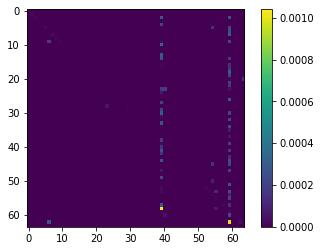

In [32]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_neg = mat_contents['G_neg']

vRead = 0.2

arr = 1
Vgate = 5
Vref = 0.5

targetTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 3.8, 0.05)
vGateSetRamp = np.arange(0.4, 1.65, 0.05)
vResetRamp = np.arange(0.3, 5.1, 0.20)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 5

DiffG = np.abs(Gmap1Fix - targetG)
rowscols=np.nonzero(DiffG >10e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
arr = 1
numRows = 64
numCols = 64
Gmap1Fix = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1Fix[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap1Fix)
plt.colorbar()

save_workspace(vars(), note='Prober2_Chp42_Arr1_LinEq_After4')

Device (row= 0 col= 0 ) switched OFF at V= 1.1
Device (row= 0 col= 0 ) switched OFF at Vgate= 5.0
Device (row= 0 col= 0 ) switched ON at V= 0.35
Device (row= 0 col= 0 ) switched ON at Vgate= 0.4
Success! Array 1 , device (row= 0 col= 0 ) Init G= 2.5317693059628545e-05  Final G= 2.258064516129032e-05 Err= 2.58064516129032e-06
Success! Array 1 , device (row= 2 col= 2 ) Init G= 2.6001955034213097e-05  Final G= 2.258064516129032e-05 Err= 2.58064516129032e-06
Device (row= 2 col= 39 ) switched OFF at V= 3.1
Device (row= 2 col= 39 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 2 col= 39 ) Init G= 0.0002668621700879765  Final G= 0.0 Err= 0.0
Device (row= 2 col= 59 ) switched OFF at V= 3.1
Device (row= 2 col= 59 ) switched OFF at Vgate= 5.0
Success! Array 1 , device (row= 2 col= 59 ) Init G= 0.0002417725643532095  Final G= 0.0 Err= 0.0
Success! Array 1 , device (row= 3 col= 3 ) Init G= 1.98435972629521e-05  Final G= 1.98435972629521e-05 Err= -1.5640273704790053e-07
Device (row= 4 

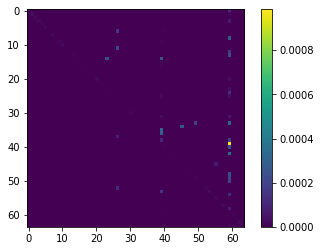

In [37]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_neg = mat_contents['G_neg']

vRead = 0.2

arr = 1
Vgate = 5
Vref = 0.5

targetTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_neg[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 3.8, 0.05)
vGateSetRamp = np.arange(0.4, 1.65, 0.05)
vResetRamp = np.arange(0.3, 5.1, 0.20)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 5

DiffG = np.abs(Gmap1Fix - targetG)
rowscols=np.nonzero(DiffG >3e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
arr = 1
numRows = 64
numCols = 64
Gmap1Fix = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap1Fix[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap1Fix)
plt.colorbar()

save_workspace(vars(), note='Prober2_Chp42_Arr1_LinEq_After5')

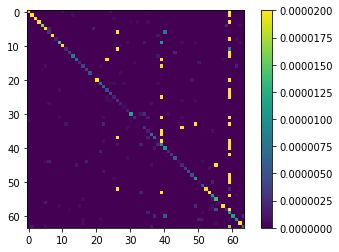

In [38]:
plt.imshow(Gmap1Fix, clim=[0, 20e-6])
plt.colorbar()

Working on number  0 , out of 187
Device (row= 0 col= 1 ) switched ON at V= 2.8000000000000007
Device (row= 0 col= 1 ) switched ON at Vgate= 0.8999999999999999
Success! Array 0 , device (row= 0 col= 1 ) Init G= 0.0  Final G= 1.2504887585532747e-05 Err= 2.504887585532746e-06
Working on number  1 , out of 187
Device (row= 0 col= 27 ) switched OFF at V= 1.3
Device (row= 0 col= 27 ) switched OFF at Vgate= 5.0
Success! Array 0 , device (row= 0 col= 27 ) Init G= 3.831867057673509e-06  Final G= 2.7370478983382204e-06 Err= 2.7370478983382204e-06
Working on number  2 , out of 187
Device (row= 0 col= 33 ) switched OFF at V= 1.3
Device (row= 0 col= 33 ) switched OFF at Vgate= 5.0
Success! Array 0 , device (row= 0 col= 33 ) Init G= 3.558162267839687e-06  Final G= 1.6422287390029323e-06 Err= 1.6422287390029323e-06
Working on number  3 , out of 187
Device (row= 0 col= 59 ) switched OFF at V= 3.3
Device (row= 0 col= 59 ) switched OFF at Vgate= 5.0
Success! Array 0 , device (row= 0 col= 59 ) Init G= 0

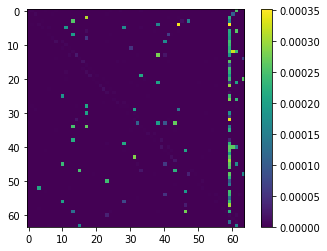

In [39]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_pos = mat_contents['G_pos']

arr = 0
numRows = 64
numCols = 64
Gmap0start = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0start[rr,cc] = rdCurr/vRead

vRead = 0.2

arr = 0
Vgate = 5
Vref = 0.5

targetTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 3.6, 0.1)
vGateSetRamp = np.arange(0.4, 1.65, 0.05)
vResetRamp = np.arange(0.3, 5.1, 0.20)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 4

DiffG = np.abs(Gmap0start - targetG)
rowscols=np.nonzero(DiffG >3e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    print('Working on number ', ii, ', out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
arr = 0
numRows = 64
numCols = 64
Gmap0post = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0post[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0post)
plt.colorbar()

save_workspace(vars(), note='Prober2_Chp42_Arr0_LinEq_After01')

Working on number  0 , out of 236
Device (row= 0 col= 1 ) switched ON at V= 2.3000000000000007
Device (row= 0 col= 1 ) switched ON at Vgate= 0.7999999999999999
Success! Array 0 , device (row= 0 col= 1 ) Init G= 5.747800586510264e-06  Final G= 1.1632453567937438e-05 Err= 1.6324535679374375e-06
Working on number  1 , out of 236
Device (row= 0 col= 27 ) switched OFF at V= 2.9
Device (row= 0 col= 27 ) switched OFF at Vgate= 5.0
Success! Array 0 , device (row= 0 col= 27 ) Init G= 3.2844574780058646e-06  Final G= 0.0 Err= 0.0
Working on number  2 , out of 236
Device (row= 0 col= 33 ) switched OFF at V= 0.5
Device (row= 0 col= 33 ) switched OFF at Vgate= 5.0
Success! Array 0 , device (row= 0 col= 33 ) Init G= 3.318670576735092e-06  Final G= 2.7370478983382204e-06 Err= 2.7370478983382204e-06
Working on number  3 , out of 236
Device (row= 0 col= 61 ) switched OFF at V= 2.9
Device (row= 0 col= 61 ) switched OFF at Vgate= 5.0
Success! Array 0 , device (row= 0 col= 61 ) Init G= 0.00024405343760182

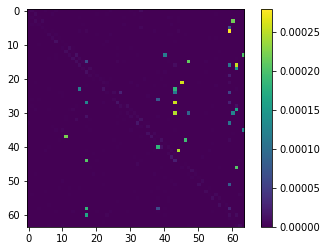

In [43]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_pos = mat_contents['G_pos']

vRead = 0.2

arr = 0
Vgate = 5
Vref = 0.5

targetTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 3.6, 0.1)
vGateSetRamp = np.arange(0.4, 1.65, 0.05)
vResetRamp = np.arange(0.3, 5.1, 0.20)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 4

DiffG = np.abs(Gmap0post - targetG)
rowscols=np.nonzero(DiffG >3e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    print('Working on number ', ii, ', out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
arr = 0
numRows = 64
numCols = 64
Gmap0post = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0post[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0post)
plt.colorbar()

save_workspace(vars(), note='Prober2_Chp42_Arr0_LinEq_After02')

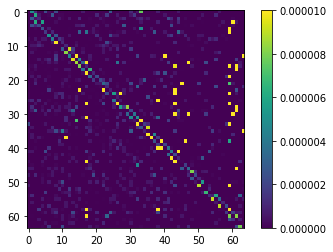

In [44]:
plt.imshow(Gmap0post, clim=[0,10e-6])
plt.colorbar()

Working on number  0 , out of 157
Device (row= 0 col= 1 ) switched ON at V= 0.41999999999999993
Device (row= 0 col= 1 ) switched ON at Vgate= 0.48
Success! Array 0 , device (row= 0 col= 1 ) Init G= 4.652981427174976e-06  Final G= 8.296676441837731e-06 Err= -1.7033235581622699e-06
Working on number  1 , out of 157
Device (row= 0 col= 33 ) switched OFF at V= 1.1999999999999997
Device (row= 0 col= 33 ) switched OFF at Vgate= 5.0
Success! Array 0 , device (row= 0 col= 33 ) Init G= 5.474095796676441e-06  Final G= 2.4633431085043987e-06 Err= 2.4633431085043987e-06
Working on number  2 , out of 157
Success! Array 0 , device (row= 1 col= 2 ) Init G= 9.494134897360703e-06  Final G= 9.69941348973607e-06 Err= -3.005865102639301e-07
Working on number  3 , out of 157
Device (row= 2 col= 1 ) switched ON at V= 1.2199999999999995
Device (row= 2 col= 1 ) switched ON at Vgate= 0.5599999999999999
Success! Array 0 , device (row= 2 col= 1 ) Init G= 5.474095796676442e-07  Final G= 7.749266862170088e-06 Err=

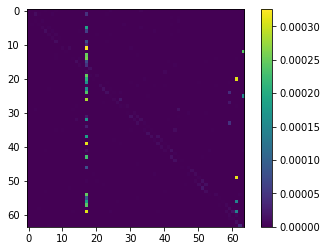

In [45]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('schroedinger_superT_v1.mat')
G_pos = mat_contents['G_pos']
G_neg = mat_contents['G_neg']

vRead = 0.2

arr = 0
Vgate = 5
Vref = 0.5

targetTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:64,0:64] = G_pos[0:64,0:64]

targetGTolerance = np.ones((64,64))*targetTolerance

vSetRamp = np.arange(0.3, 3.1, 0.04)
vGateSetRamp = np.arange(0.4, 1.65, 0.04)
vResetRamp = np.arange(0.3, 5.1, 0.15)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
    
maxLoops = 4

DiffG = np.abs(Gmap0post - targetG)
rowscols=np.nonzero(DiffG >3e-6)
testRows = rowscols[0]
testCols = rowscols[1]

numDevices = np.size(testRows)
finalG = []
initG = []

for ii in range(numDevices):
    print('Working on number ', ii, ', out of', numDevices)
    rr = testRows[ii]
    cc = testCols[ii]       
    targetConductance = targetG[rr,cc]
    targetTol = targetGTolerance[rr,cc]
    initG.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    finalG.append(a0.cell_program_with_fb(arr, rr, cc, targetConductance, targetTol, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops))
    if ( (finalG[ii] >= (targetConductance-targetTol)) & (finalG[ii] <= (targetConductance+targetTol)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[ii], ' Final G=', finalG[ii], 'Err=', (finalG[ii]-targetConductance))
        
arr = 0
numRows = 64
numCols = 64
Gmap0post = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap0post[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap0post)
plt.colorbar()

save_workspace(vars(), note='Prober2_Chp42_Arr0_LinEq_After03')

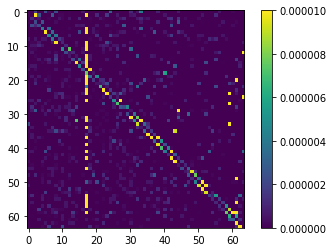

In [46]:
plt.imshow(Gmap0post, clim=[0,10e-6])
plt.colorbar()

271.7857394218445


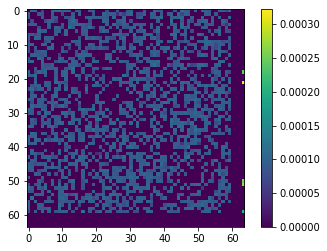

In [47]:
arr = 2
numRows = 64
numCols = 64
Gmap2post = np.zeros((numRows, numCols))
ts = time.time()
for rr in range(numRows):
        for cc in range(numCols):
            #rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            rdCurr = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc,gain=-1)
            Gmap2post[rr,cc] = rdCurr/vRead
print(time.time()-ts)
plt.imshow(Gmap2post)
plt.colorbar()

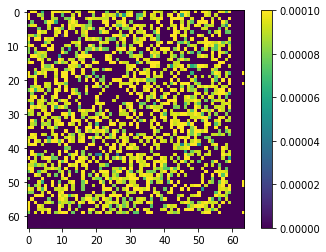

In [48]:
plt.imshow(Gmap2post, clim=[0,100e-6])
plt.colorbar()